In [2]:
# Odpalanie wielu obrazów z H5PY
import napari
from skimage import io
import os

import numpy as np
from scipy.io import savemat
from scipy.io import loadmat

from numpy.fft import fft2, ifft2, fftshift, ifftshift

from scipy.ndimage import median_filter

import tifffile

import h5py

def read_HDF5(file_name):
    with h5py.File(file_name, 'r') as f:
        cell_matrix = f['Cell'][:]
        OCT_matrix = f['OCT'][:]
    return cell_matrix, OCT_matrix


# Path to the directory
data_directory = './Data/Mitochondrium_test_policzone'


# Initialize the viewer
viewer = napari.Viewer()

cnt = 0
for i, file_name in enumerate(sorted(os.listdir(data_directory))):
    if file_name.endswith('.h5'):
        print(file_name)

        image_path = os.path.join(data_directory, file_name)
        cell_matrix, OCT_matrix = read_HDF5(image_path)
        
        n1 = "Cell" + str(cnt)
        n2 = "OCT" + str(cnt)

        viewer.add_image(cell_matrix , name=n1, colormap='viridis')
        viewer.add_image(OCT_matrix , name=n2, colormap='viridis')
        cnt += 1

# Start the napari viewer
napari.run()

AICS-11_1_230741_converted.h5
AICS-11_1_230745_converted.h5
AICS-11_1_230746_converted.h5
AICS-11_1_230748_converted.h5
AICS-11_1_230754_converted.h5
AICS-11_1_230755_converted.h5
AICS-11_1_230757_converted.h5
AICS-11_1_230758_converted.h5
AICS-11_1_230759_converted.h5
AICS-11_1_230760_converted.h5
AICS-11_1_230761_converted.h5
AICS-11_1_230762_converted.h5
AICS-11_1_230763_converted.h5
AICS-11_1_230764_converted.h5
AICS-11_1_230765_converted.h5


In [2]:
# Odpalanie obrazów z predict z H5PY
import napari
from skimage import io
import os

import numpy as np
from scipy.io import savemat
from scipy.io import loadmat

from numpy.fft import fft2, ifft2, fftshift, ifftshift

from scipy.ndimage import median_filter

import tifffile

import h5py

def read_HDF5(file_name):
    with h5py.File(file_name, 'r') as f:
        cell_matrix = f['Cell_base'][:]
        predict_matrix = f['Cell_predict'][:]
    return cell_matrix, predict_matrix


def load_data(data_directory,):
    cnt = 0
    for i, file_name in enumerate(sorted(os.listdir(data_directory))):
        if file_name.endswith('.h5'):
            print(file_name)

            image_path = os.path.join(data_directory, file_name)

            cell_matrix, OCT_matrix = read_HDF5(image_path)

            print(np.int16(cell_matrix[27,80,50:]))
            print((np.int16(OCT_matrix[27,80,50:])))
            
            n1 = "Cell" + str(cnt)
            n2 = "Predict" + str(cnt)

            viewer.add_image(np.int16(cell_matrix) , name=n1, colormap='viridis')
            viewer.add_image(np.int16(OCT_matrix) , name=n2, colormap='viridis')
            cnt += 1 


# Path to the directory
data_predict = 'C:/Python/Studia/U-NET/output/predict'
data_orginal = 'C:/Python/Studia/U-NET/dataset/predict'

# Initialize the viewer
viewer = napari.Viewer()

load_data(data_predict)

# Start the napari viewer
napari.run()

AICS-11_1_230746_predict.h5
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  68  74
  85 102  97  86  83  78  83  92  92  92  95  93 102 104 105 104 100   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  

Processing file: AICS-11_1_230746_converted.h5


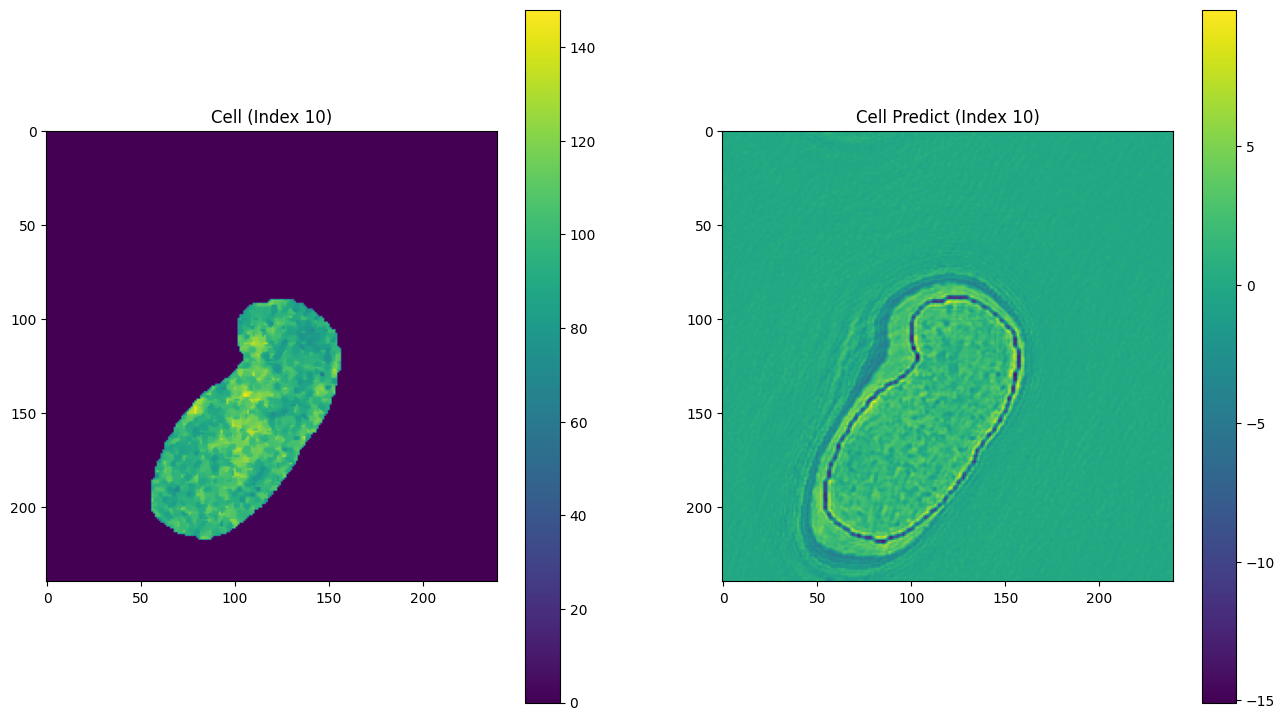

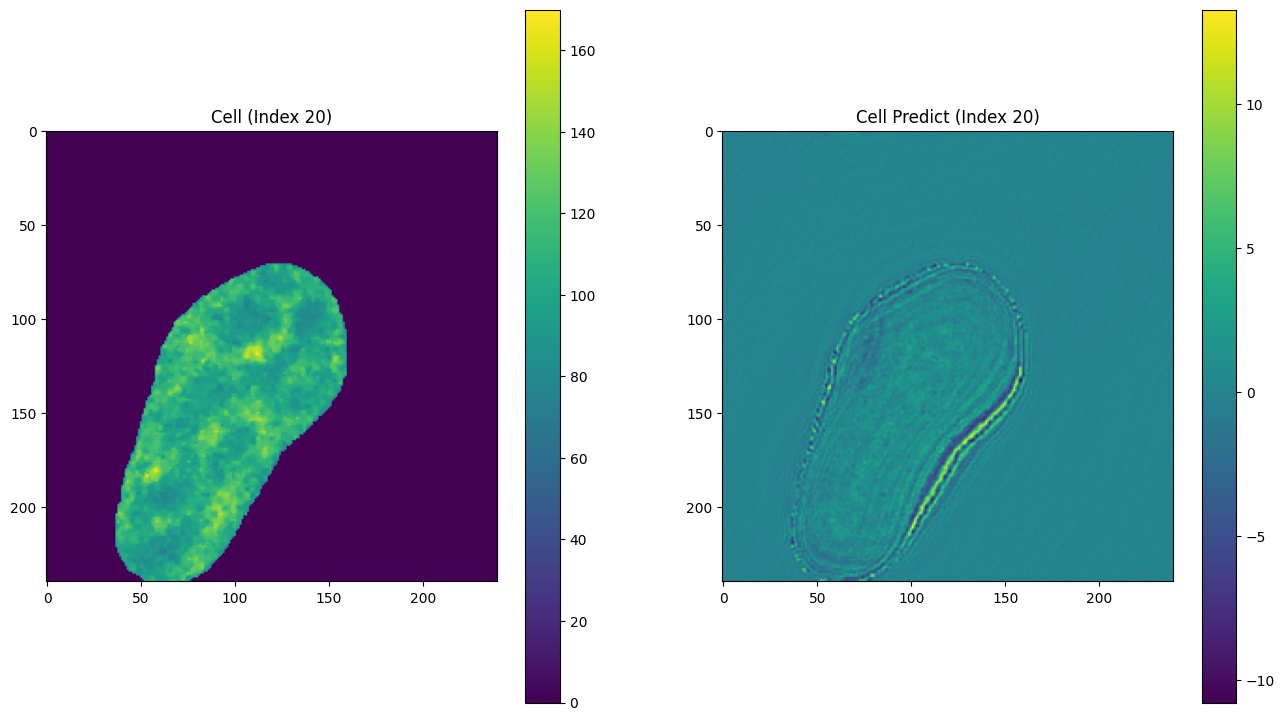

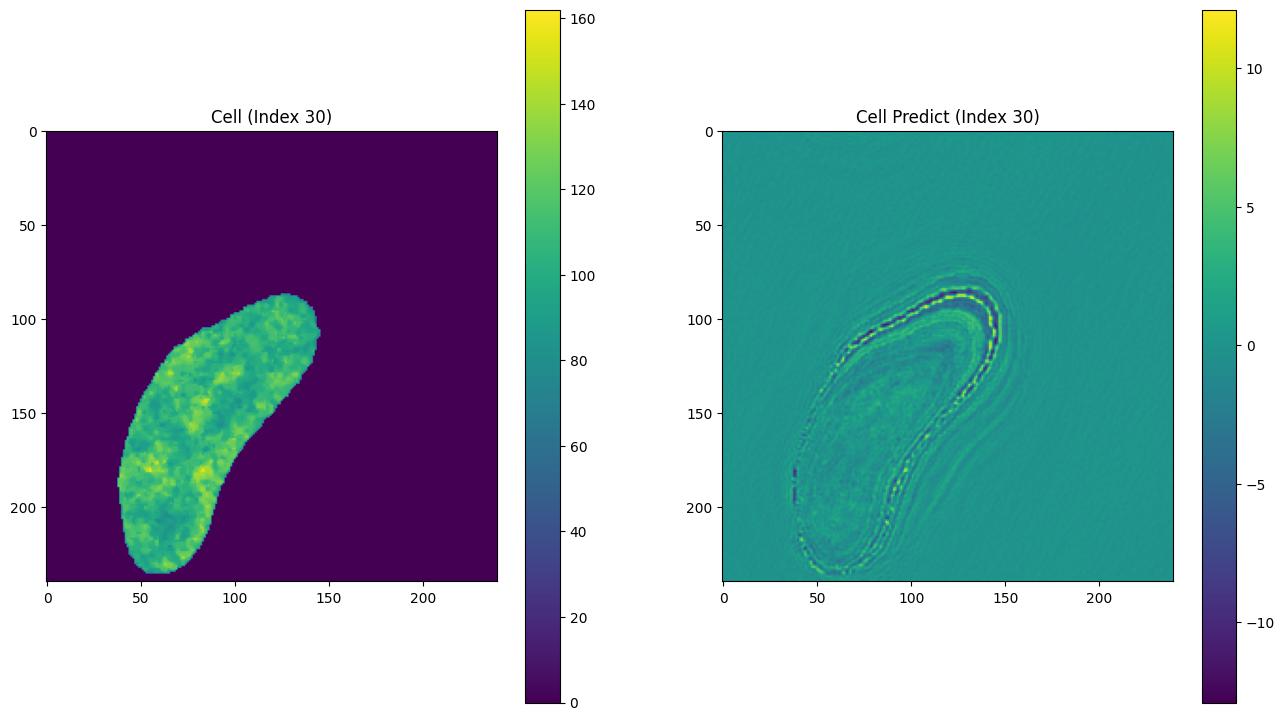

In [3]:
# Odpalanie bazowych obrazów

import os
import numpy as np

import h5py
import matplotlib.pyplot as plt

def read_HDF5(file_name):
    with h5py.File(file_name, 'r') as f:
        cell_matrix = f['Cell'][:]
        predict_matrix = f['OCT'][:]
    return cell_matrix, predict_matrix

def display_and_save_images(cell_matrix, cell_predict_matrix, output_dir, index):
    """
    Wyświetla i zapisuje obrazy dla podanego indeksu w pierwszym wymiarze macierzy.
    """
    # Upewnij się, że folder wyjściowy istnieje
    os.makedirs(output_dir, exist_ok=True)

    # Iteruj po wybranych indeksach pierwszego wymiaru
    for i in index:
        if i < 0 or i >= cell_matrix.shape[0]:
            print(f"Index {i} is out of bounds for the matrix with shape {cell_matrix.shape}")
            continue

        # Pobierz obrazy o wymiarach 240x240 dla danego indeksu
        cell_image = cell_matrix[i, :, :]
        cell_predict_image = cell_predict_matrix[i, :, :]

        # Utwórz figure z dwoma osiami
        fig, axes = plt.subplots(1, 2, figsize=(16, 9))

        # Wyświetl obrazy z odpowiednimi skalami wartości
        im1 = axes[0].imshow(cell_image, cmap='viridis')
        axes[0].set_title(f'Cell (Index {i})')
        fig.colorbar(im1, ax=axes[0], orientation='vertical')

        im2 = axes[1].imshow(cell_predict_image, cmap='viridis')
        axes[1].set_title(f'Cell Predict (Index {i})')
        fig.colorbar(im2, ax=axes[1], orientation='vertical')

        '''# Zapisz obraz do pliku
        output_path = os.path.join(output_dir, f'Image_Index_{i}.png')
        plt.savefig(output_path, bbox_inches='tight')
        print(f"Saved image to {output_path}")'''

        # Pokaż obraz
        plt.show()


def load_data_and_display(data_directory, output_directory, indices):
    cnt = 0
    for i, file_name in enumerate(sorted(os.listdir(data_directory))):
        if file_name.endswith('.h5'):
            print(f"Processing file: {file_name}")

            image_path = os.path.join(data_directory, file_name)

            cell_matrix, cell_predict_matrix = read_HDF5(image_path)

            # Wyświetl i zapisz obrazy dla wybranych indeksów
            display_and_save_images(cell_matrix, cell_predict_matrix, output_directory, indices)

# Ścieżka do katalogu
data_predict = 'C:/Python/Studia/U-NET/output/predict'
data_train = 'C:/Python/Studia/U-NET/dataset/train'
output_directory = 'C:/Python/Studia/U-NET/output/Image'

# Wybrane indeksy pierwszego wymiaru do wyświetlenia
selected_indices = [10, 20, 30]

# Wczytaj dane i wyświetl obrazy
load_data_and_display(data_train, output_directory, selected_indices)

In [8]:
# Odpalanie konkretnego obrazu z H5PY
import napari
from skimage import io
import os

import numpy as np
from scipy.io import savemat
from scipy.io import loadmat

from numpy.fft import fft2, ifft2, fftshift, ifftshift

from scipy.ndimage import median_filter

import tifffile

import h5py

def read_HDF5(file_name):
    with h5py.File(file_name, 'r') as f:
        cell_matrix = f['Cell'][:]
        OCT_matrix = f['OCT'][:]
    return cell_matrix, OCT_matrix


# Path to the directory
data_directory = 'C:\Python\Studia\Praca Magisterska\Data\Mitochondrium_1_policzone' #'D:/Praca_Magisterska_Dane/Mitochondrium_1_policzone'

file_name = 'AICS-11_1_230754_converted.h5'

#AICS-11_22_231900
#AICS-11_21_231883
#AICS-11_22_231913

# in 2
# AICS-11_818_253911.ome.tif
# AICS-11_819_253948.ome.tif
# AICS-11_819_253950.ome.tif
# AICS-11_830_254359.ome.tif

# 3
# AICS-11_838_254633.ome.tif
# AICS-11_838_254636.ome.tif

# 5 
# AICS-11_913_257263.ome.tif
# AICS-11_927_257672.ome.tif
# AICS-11_938_258090.ome.tif

# 6
# AICS-11_940_258185.ome.tif
# AICS-11_950_258496.ome.tif

# 7
# AICS-11_976_259442.ome.tif

# 8
# AICS-11_1000_260333.ome.tif

# 10
# AICS-11_1082_263216.ome.tif
# AICS-11_1087_263394.ome.tif

# 11
# AICS-11_1116_264275.ome.tif

# 14
# AICS-11_1216_267492.ome.tif


image_path = os.path.join(data_directory, file_name)
cell_matrix, OCT_matrix = read_HDF5(image_path)
        
n1 = "Cell"
n2 = "OCT"

# Initialize the viewer
viewer = napari.Viewer()

viewer.add_image(cell_matrix , name=n1, colormap='viridis')
viewer.add_image(OCT_matrix , name=n2, colormap='viridis')

# Start the napari viewer
napari.run()

In [5]:
# Sprawdzanie orginalnych danychdanych
import napari
from skimage import io
import os

import numpy as np
from scipy.io import savemat
from scipy.io import loadmat

# Path to the directory
data_directory = 'C:\Python\Studia\Praca Magisterska\Data\Mitochondrium_test'  #'D:/Praca_Magisterska_Dane/Mitochondrium_2'

file_name = 'AICS-11_1_230746.ome.tif'

# in 2
# AICS-11_818_253911.ome.tif
# AICS-11_819_253948.ome.tif
# AICS-11_819_253950.ome.tif
# AICS-11_830_254359.ome.tif

# Initialize the viewer
viewer = napari.Viewer()


image_path = os.path.join(data_directory, file_name)
image = io.imread(image_path)
print("Rozmiar obrazu:", image.shape)
viewer.add_image(image, colormap='viridis')



# Start the napari viewer
napari.run()

Rozmiar obrazu: (40, 9, 265, 170)


In [2]:
# Kod do analizy Masek z matlaba oraz zapisu masek do pliku TIFF
import napari
import tifffile
import numpy as np
import h5py
from scipy.io import loadmat

def Add_viev(file_path, name_, describe, filename):
    # Wczytanie pliku
    mask = loadmat(file_path)

    # Dostęp do zmiennej EW_int (przykładowo, jeśli taka istnieje w pliku)
    EW_int = mask['EW_int']

    # Sprawdzenie kształtu macierzy
    print("Rozmiar maski przed:",EW_int.shape)

    # Zamiana wymiarów na (180, 720, 720)
    mask_matrix = np.transpose(EW_int, (2, 0, 1))

    viewer.add_image(mask_matrix , name=name_, colormap='viridis')

    if(describe == 0):
        # Sprawdzenie rozmiaru macierzy
        rozmiar = mask_matrix.shape

        # Obliczenie podstawowych statystyk
        maksymalna_wartosc = np.max(mask_matrix)
        minimalna_wartosc = np.min(mask_matrix)
        srednia_wartosc = np.mean(mask_matrix)
        mediana = np.median(mask_matrix)

        # Wyświetlenie wyników
        print("Informacje o macierzy real_part_inverse_fourier_transform:")
        print("Rozmiar:", rozmiar)
        print("Maksymalna wartość woksela:", maksymalna_wartosc)
        print("Minimalna wartość woksela:", minimalna_wartosc)
        print("Średnia wartość woksela:", srednia_wartosc)
        print("Mediana wartości wokseli:", mediana)
        print("\n")
    elif(describe == 1):
        filename_with_extension = filename + ".tiff"
        # Zapisz jako wielowarstwowy plik TIFF
        tifffile.imwrite(filename_with_extension, mask_matrix)
    return mask_matrix


# Odczyt dwóch macierzy z pliku HDF5
def read_HDF5(file_name, param):
    new_filename = file_name.replace( "_converted.h5", param+".h5")
    print(new_filename)
    with h5py.File(new_filename, 'r') as f:
        cell_matrix = f['Cell'][:]
        OCT_matrix = f['OCT'][:]

    # Weryfikacja rozmiarów i typów odczytanych macierzy
    print("Macierz 1:", cell_matrix.shape, cell_matrix.dtype)
    print("Macierz 2:", OCT_matrix.shape, OCT_matrix.dtype)
    print("\n")

    n1 = "Cell" + param
    n2 = "OCT" + param

    viewer.add_image(cell_matrix , name=n1, colormap='viridis')
    viewer.add_image(OCT_matrix , name=n2, colormap='viridis')

# Initialize the viewer
viewer = napari.Viewer()
Mask_720_45 = Add_viev('./EW_int_720_45.mat', "Mask_720_45", 0, "Mask_720_45")
Mask_912_47 = Add_viev('./EW_int_912_47.mat', "Mask_912_47", 0, "Mask_912_47")
Mask_528_66 =  Add_viev('./EW_int_528_66.mat', "Mask_528_66", 0, "Mask_528_66")
Mask_432_108 =  Add_viev('./EW_int_432_108.mat', "Mask_432_108", 0, "Mask_432_108")

read_HDF5("AICS-11_1_230745_converted.h5", "_432_108")
read_HDF5("AICS-11_1_230745_converted.h5", "_720_45")
read_HDF5("AICS-11_1_230745_converted.h5", "_912_47")
read_HDF5("AICS-11_1_230745_converted.h5", "_528_66")

# Start the napari viewer
napari.run()


Rozmiar maski przed: (720, 720, 45)
Informacje o macierzy real_part_inverse_fourier_transform:
Rozmiar: (45, 720, 720)
Maksymalna wartość woksela: 1
Minimalna wartość woksela: 0
Średnia wartość woksela: 0.07634945130315501
Mediana wartości wokseli: 0.0


Rozmiar maski przed: (912, 912, 57)
Informacje o macierzy real_part_inverse_fourier_transform:
Rozmiar: (57, 912, 912)
Maksymalna wartość woksela: 1
Minimalna wartość woksela: 0
Średnia wartość woksela: 0.07446072728855842
Mediana wartości wokseli: 0.0


Rozmiar maski przed: (528, 528, 66)
Informacje o macierzy real_part_inverse_fourier_transform:
Rozmiar: (66, 528, 528)
Maksymalna wartość woksela: 1
Minimalna wartość woksela: 0
Średnia wartość woksela: 0.0717479547541531
Mediana wartości wokseli: 0.0


Rozmiar maski przed: (432, 432, 108)
Informacje o macierzy real_part_inverse_fourier_transform:
Rozmiar: (108, 432, 432)
Maksymalna wartość woksela: 1
Minimalna wartość woksela: 0
Średnia wartość woksela: 0.06820432964042575
Mediana war